# DS 7331 Data Mining: Lab 1 iPython Notebook

### Created On: January 19, 2019
### Authors:  
####                 Arora, Tanvi                
####                 Chandna, Rajat
####                 Henderson Kuns, Nicol
####                 Kumar, Ramasundaram
####                 Vasquez, James


# Business Understanding 

The data set selected is 'Bank Marketing', which is from the UCI Machine Learning Repository site.  The data contains, 45,211 rows and 17 attributes.  The data set is unbalance as the response variable is 11% of the total data set.  The data was collected from May of 2008 to November 2010.  This data set follows Portuguese telemarketing campaign to secure term deposits. 

The Portuguese market dramatically took a steep decline in 2008 and started an upward movement in 2013 but not nearly to what the market was prior to 2008.  This deep drop is consistent with the global recession at the time figure 1.

_Figure 1:_
![alt text](https://github.com/nhendersonkuns/awesomedataminers/raw/master/ReferenceMaterial/StockMarketCompare.PNG "US vs Portugal Stock")

The goal of this data set and followed analysis is to predict whether a client would subscribe to a term deposit.  This is measured by the attribute 'Subscribed' as a binary response of yes/no. 

The team will pursue several methodologies in creating an accurate predictive model for analysis with models built using logistic regression, support vector machines (SVM) and decision trees methods which will be built in Python.  Each model type will be validated by use of cross validation specifically k-fold cross validation (k10).

To measure the effectiveness/success of these models the team will use techniques such as Percent Correct Classification (PCC) and Confusion Matrix's which will summarizes different kinds of errors (Type I and Type II errors).  These methods will allow the team to understand the accuracy and precision of the models being built.

# Data Meaning Type

# Data Quality

In [67]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots inside the iPython Notebook itself
%matplotlib inline

In [68]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/bank-full.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"

58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"

44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"

33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"

47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"



In [69]:
# Import the semi-colon delimited data file into pandas dataFrame
bankPromo_df = pd.read_csv(pathOfDataFile, sep = ";")
bankPromo_df.head(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


In [70]:
bankPromo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Data Types for columns are matching as specified in data description. Columns containing numeric data are represented as of type "int64" ( values in those columns is integer and not float) and columns containing categorical variables are represented as of type "object".

dtypes: int64(7), object(10)

Also, number of entries in all columns is same, signalling that either data contains no missing values or missing values have been already replaced with some specific values(eg -1,999 or mean/median of the series etc). Next we would try to uncover details on these missing values.

In [71]:
bankPromo_df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [72]:
# To find duplicated rows in data Frame
bankPromo_df.duplicated().any()

False

In [73]:
# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromo_df = bankPromo_df.rename(columns={"y":"Subscribed"})

In [74]:
bankPromo_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [75]:
# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars = list()
# List to hold names of numerical variables
numericalVars = list()

for colName in bankPromo_df.columns:
    if bankPromo_df[colName].dtype == np.int64:
        numericalVars.append(colName)
    elif bankPromo_df[colName].dtype == np.object:
        categoricalVars.append(colName)
    else:
        pass

print(numericalVars)
print(categoricalVars)


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Subscribed']


In [76]:
for categoricalCol in categoricalVars:
    print("\n The Unique values(Levels) for \033[1m %s \033[0m variable are: \n" %categoricalCol.upper())
    print(pd.Series(bankPromo_df[categoricalCol].unique()))



 The Unique values(Levels) for  JOB  variable are: 

0        management
1        technician
2      entrepreneur
3       blue-collar
4           unknown
5           retired
6            admin.
7          services
8     self-employed
9        unemployed
10        housemaid
11          student
dtype: object

 The Unique values(Levels) for  MARITAL  variable are: 

0     married
1      single
2    divorced
dtype: object

 The Unique values(Levels) for  EDUCATION  variable are: 

0     tertiary
1    secondary
2      unknown
3      primary
dtype: object

 The Unique values(Levels) for  DEFAULT  variable are: 

0     no
1    yes
dtype: object

 The Unique values(Levels) for  HOUSING  variable are: 

0    yes
1     no
dtype: object

 The Unique values(Levels) for  LOAN  variable are: 

0     no
1    yes
dtype: object

 The Unique values(Levels) for  CONTACT  variable are: 

0      unknown
1     cellular
2    telephone
dtype: object

 The Unique values(Levels) for  MONTH  variable are: 

0   

Looks like for categorical variables, the missing values in columns is replaced with string "unknown" as seen from several columns above. Next look at percentage(%) of observations that are missing in these categorical variables columns.

In [77]:
sumMissingValsinCategoricalCols = dict()
for categoricalCol in categoricalVars:
    sumMissingValsinCategoricalCols[categoricalCol] = (sum(bankPromo_df[categoricalCol] == "unknown") / \
                                                       bankPromo_df[categoricalCol].count()) * 100

pd.Series(sumMissingValsinCategoricalCols)


job            0.637013
marital        0.000000
education      4.107407
default        0.000000
housing        0.000000
loan           0.000000
contact       28.798301
month          0.000000
poutcome      81.747805
Subscribed     0.000000
dtype: float64

In [78]:
# Creating a copy of original dataset and coverting Subscribed column from Yes, No to 0,1
# TO be later used in Visualizations
visDf = bankPromo_df.copy()
visDf['Subscribed_int'] = visDf['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
visDf['Subscribed_int'] = visDf['Subscribed_int'].astype(np.int)

# Simple Statistics

In [79]:
# For Numerical Variables 
bankPromo_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


*** Any Interesting Find For Numerical Variables Should be entered here ***

In [80]:
# Binning variable "balance" into different buckets for analysis
balanceBins =[-5000,0,1000,5000,10000,15000,150000]
balanceGroups = pd.cut(bankPromo_df['balance'], balanceBins).value_counts()
percentGroup = balanceGroups/(bankPromo_df['balance'].count())*100
print(percentGroup)


(0, 1000]          51.536131
(1000, 5000]       26.068877
(-5000, 0]         16.097852
(5000, 10000]       4.459092
(10000, 15000]      1.057265
(15000, 150000]     0.776360
Name: balance, dtype: float64


16% of the people contacted had either 0 or negative balance. Nearly 52% had a balance between 0 and 1000. Approximately 26% had a balance between 1000 and 5000. 94% of the people contacted had a balance of less than 5000.

In [81]:
# Binning variable "duration" into different buckets for analysis
durationBins =[0,10,120,600,1200,5000]
durationGroups = pd.cut(bankPromo_df['duration'], durationBins).value_counts()
percentGroup = durationGroups/(bankPromo_df['duration'].count())*100
print(percentGroup)

(120, 600]      60.553848
(10, 120]       30.138683
(600, 1200]      7.144279
(1200, 5000]     1.238637
(0, 10]          0.917918
Name: duration, dtype: float64


31% of the calls lasted less than 2 minutes. Two minutes or less may not be sufficient for a promotion call. 61% of the calls lasted between 2 to 5 minutes. The remaining 8% lasted for longer than five minutes.

In [82]:
# For Categorical Variables
for categoricalCol in categoricalVars:
    tmpDf1 = pd.DataFrame()
    tmpDf2 = pd.DataFrame()
    tmpDf1 = pd.crosstab(index = bankPromo_df[categoricalCol], columns = "Count", colnames = " ")
    tmpDf1["Proportion(in % of Total)"] = (tmpDf1["Count"] / tmpDf1["Count"].sum()) * 100
    tmpDf1 = tmpDf1.round(2)
    tmpDf1.index.name = tmpDf1.index.name.upper()
    tmpDf2 = pd.DataFrame(index = ["TOTAL"], data = [[tmpDf1["Count"].sum(), \
                                                      tmpDf1["Proportion(in % of Total)"].sum()]], \
                          columns=["Count", "Proportion(in % of Total)"])
    tmpDf1 = tmpDf1.append(tmpDf2)
    print("\n Counts and Frequency Table for \033[1m %s \033[0m variable is as: \n" %categoricalCol.upper())
    print(tmpDf1)
    print("\n")


 Counts and Frequency Table for  JOB  variable is as: 

               Count  Proportion(in % of Total)
admin.          5171                      11.44
blue-collar     9732                      21.53
entrepreneur    1487                       3.29
housemaid       1240                       2.74
management      9458                      20.92
retired         2264                       5.01
self-employed   1579                       3.49
services        4154                       9.19
student          938                       2.07
technician      7597                      16.80
unemployed      1303                       2.88
unknown          288                       0.64
TOTAL          45211                     100.00



 Counts and Frequency Table for  MARITAL  variable is as: 

          Count  Proportion(in % of Total)
divorced   5207                      11.52
married   27214                      60.19
single    12790                      28.29
TOTAL     45211                     

*** Any Interesting Find For Categorical Variables Should be entered here ***

# Visualize Attributes

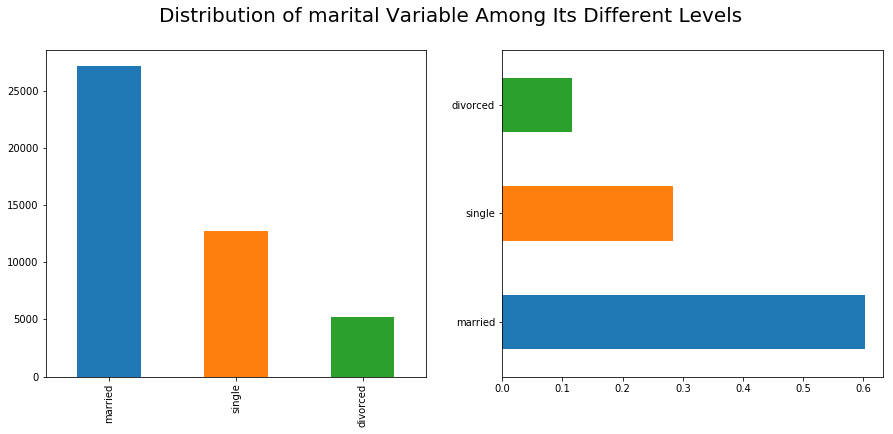

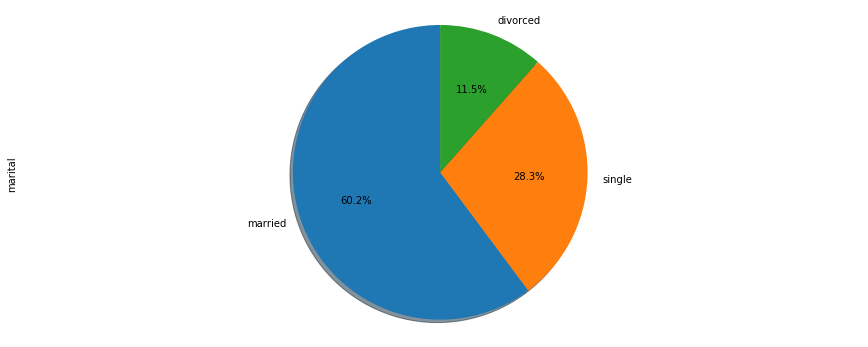

In [83]:
catVar = 'marital'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.show()

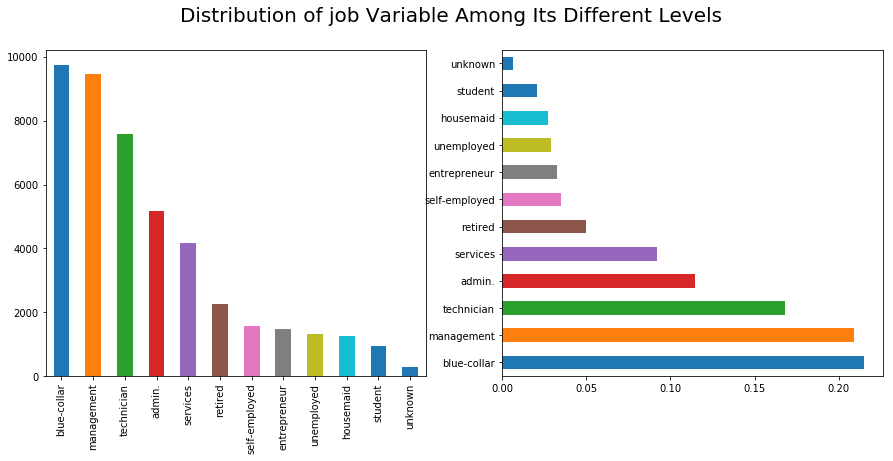

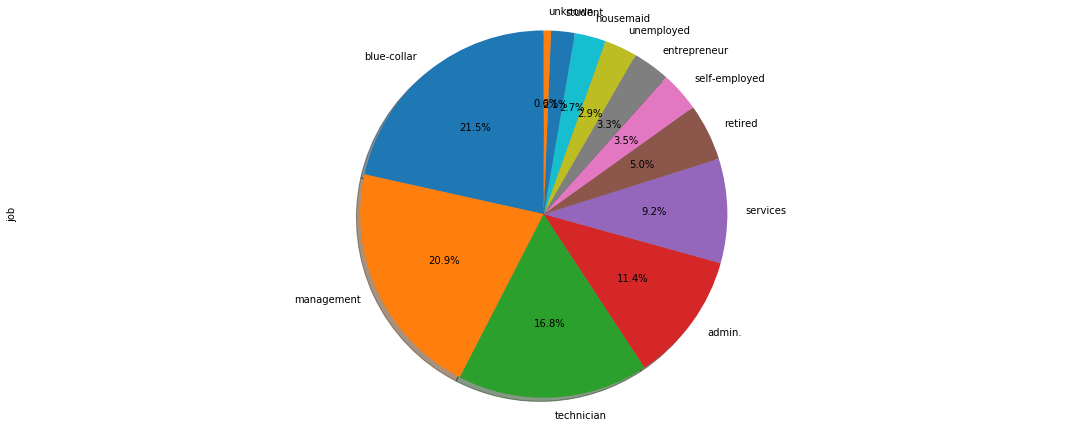

In [84]:
catVar = 'job'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.tight_layout()
plt.show()


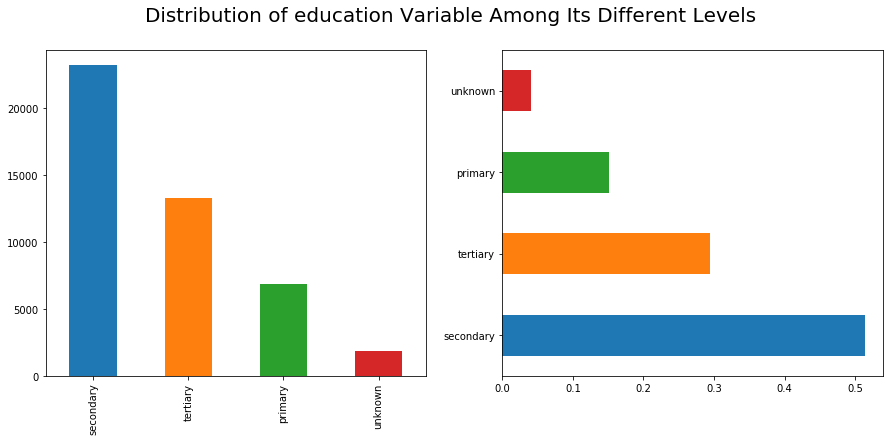

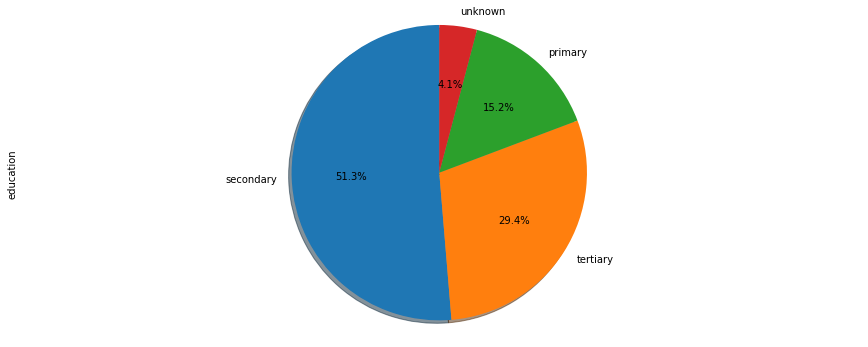

In [85]:
catVar = 'education'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.show()

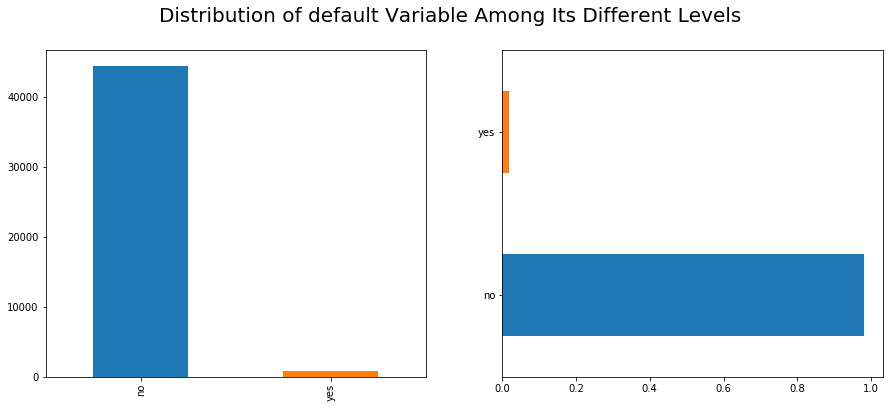

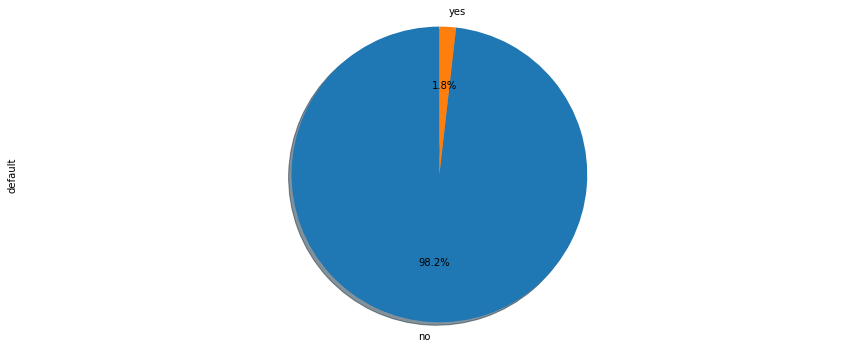

In [86]:
catVar = 'default'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.show()

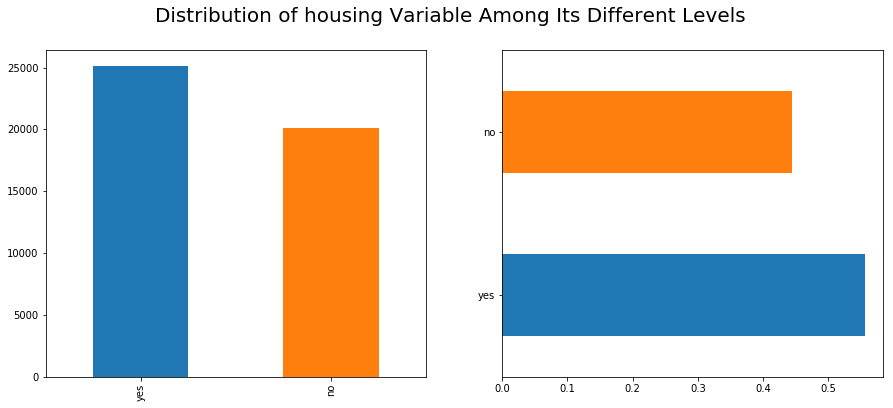

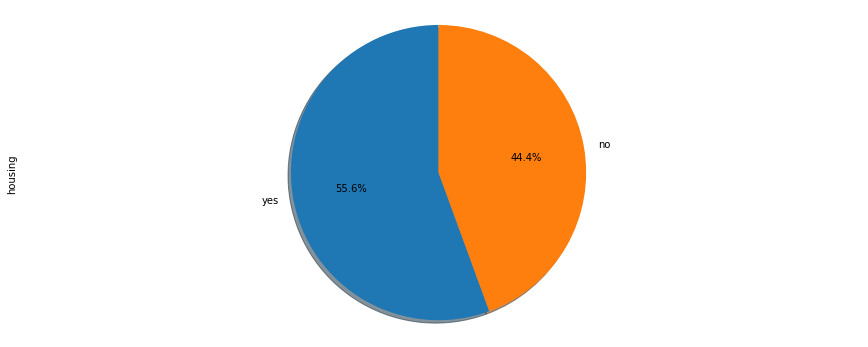

In [87]:
catVar = 'housing'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.show()

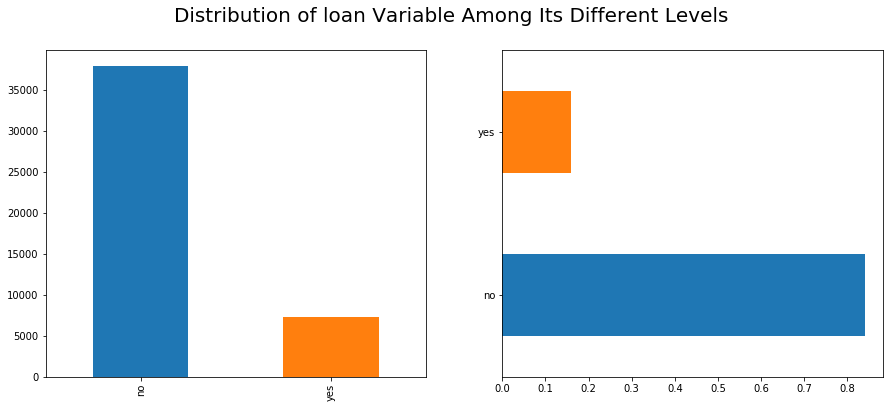

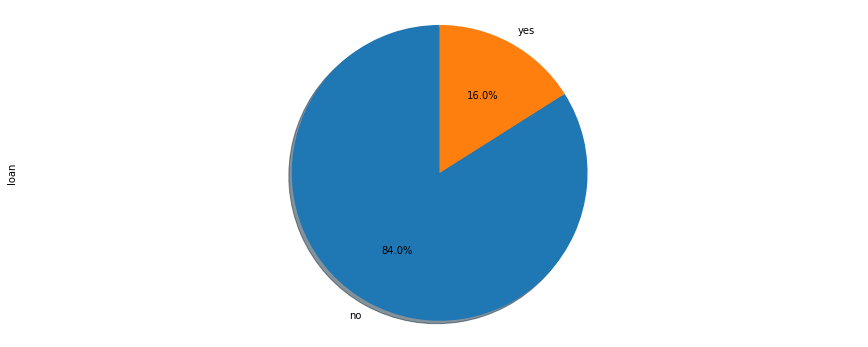

In [88]:
catVar = 'loan'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.show()

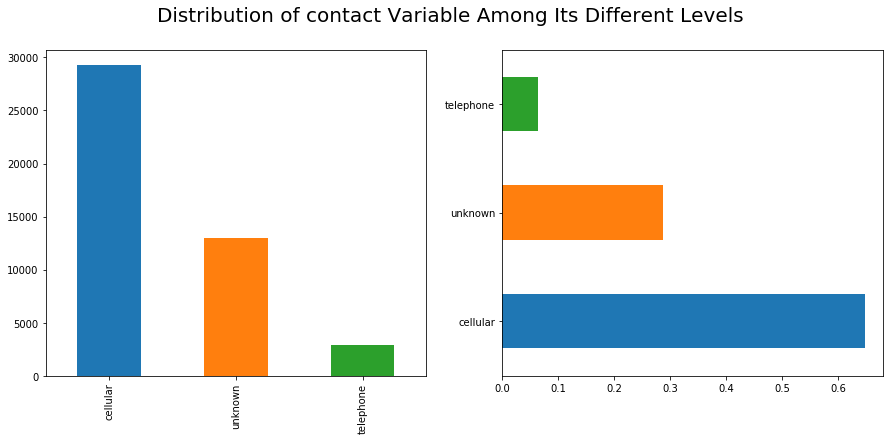

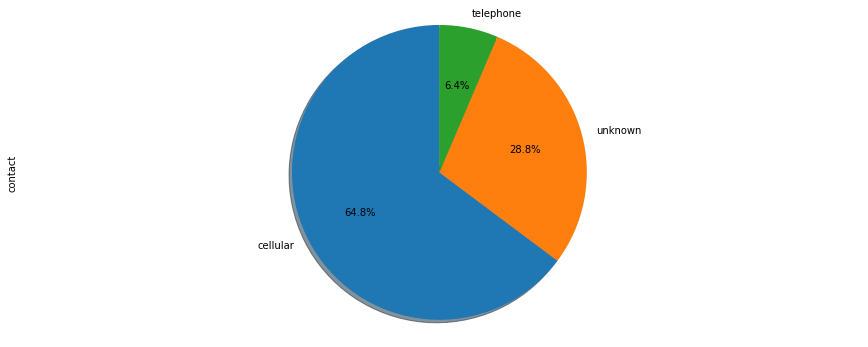

In [89]:
catVar = 'contact'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.show()

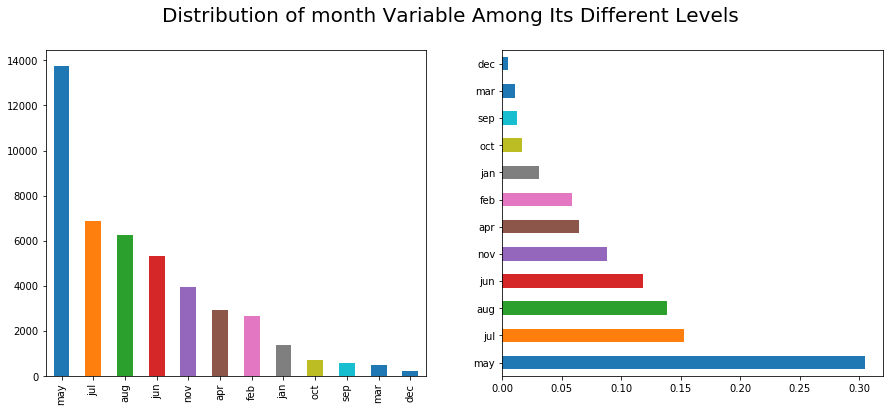

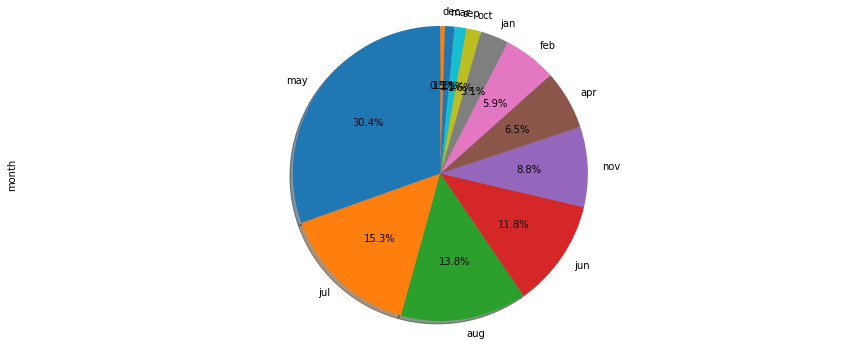

In [90]:
catVar = 'month'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.show()

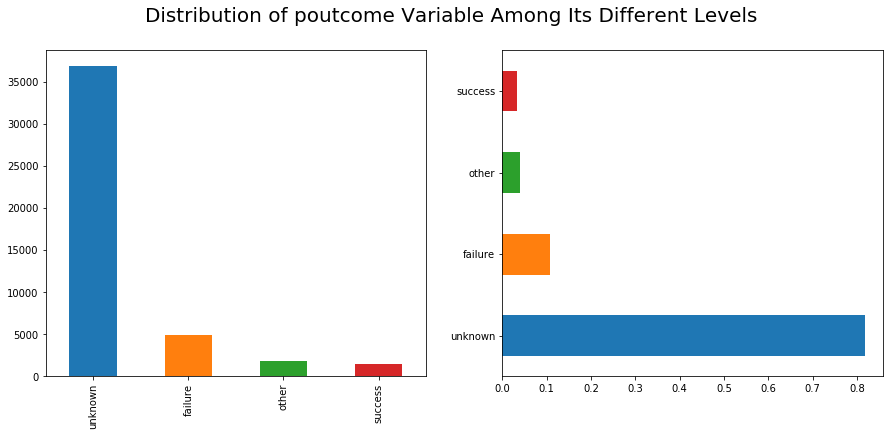

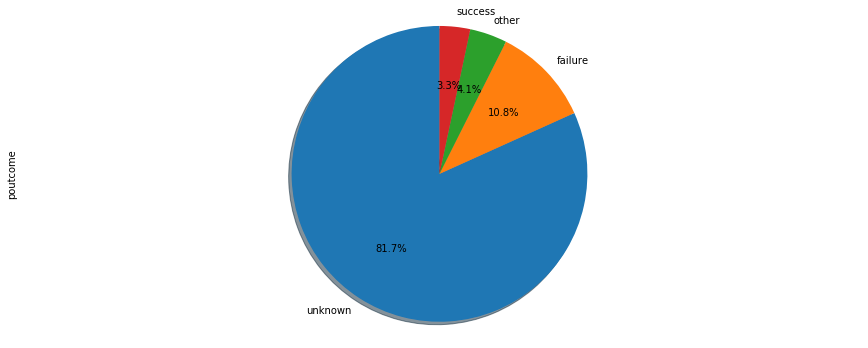

In [91]:
catVar = 'poutcome'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.show()

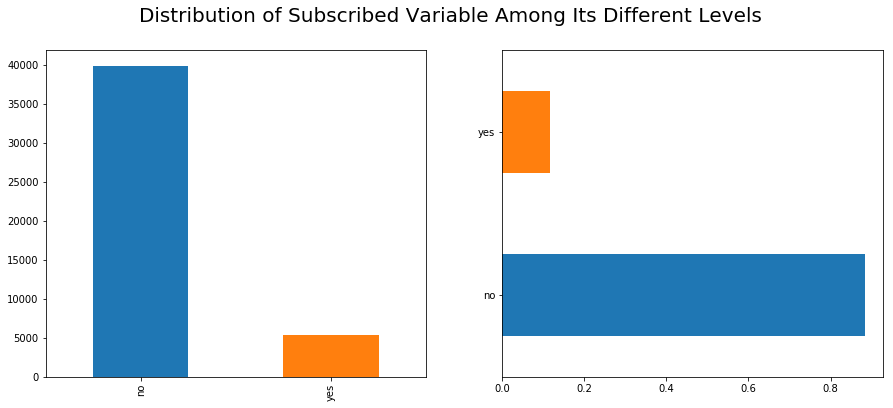

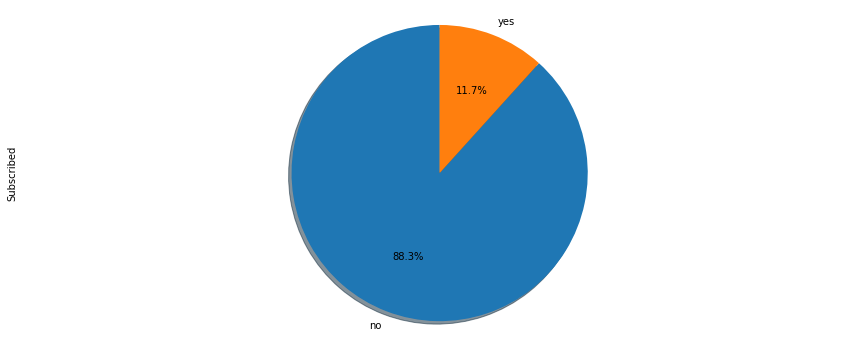

In [92]:
catVar = 'Subscribed'
fig, axes12 = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Distribution of %s Variable Among Its Different Levels'%catVar, fontsize=20)
bankPromo_df[catVar].value_counts().plot(kind='bar',ax=axes12[0])
bankPromo_df[catVar].value_counts(normalize=True).plot(kind='barh', ax=axes12[1])
fig, axes12 = plt.subplots(1,1,figsize=(15,6))
bankPromo_df[catVar].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True, startangle=90)
axes12.axis('equal')
plt.show()

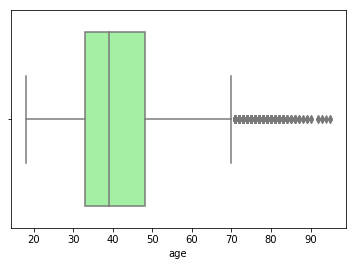

In [93]:
#Different age groups targeted for promotions

sns.boxplot(x='age', data=bankPromo_df , color="palegreen")

Bank promos were targetted on Adults only, minimum age of people contacted is 18. While the target was age group 18-70 yrs, we do see some outliers where people above 70 yrs were also called. Majority of the people called were in the age-group of 30-50, which form the working group.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


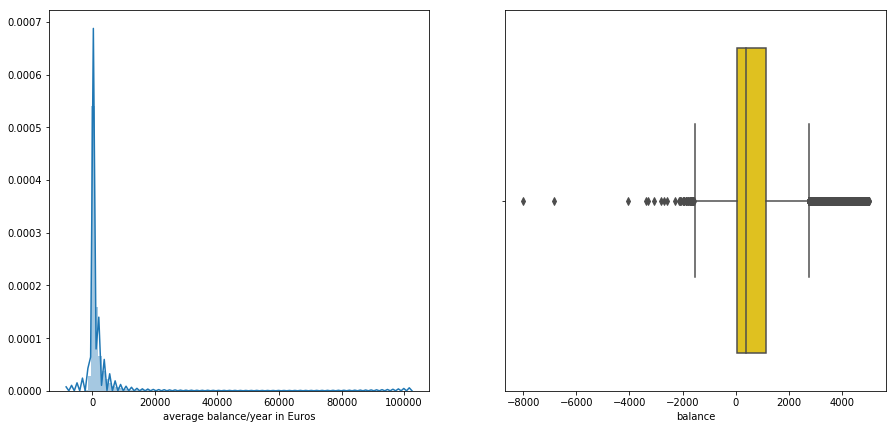

In [94]:
# visualizing average balance per year data for the people contacted for this promotion

fig = plt.figure(figsize=(15,7))

# since the range of balance is (-8000,100000), plotted normal distribution 
ax = plt.subplot(1,2,1)
sns.distplot(bankPromo_df['balance'], axlabel="average balance/year in Euros", bins=100, norm_hist=True, label="Density", ax = ax)

# to get approximate idea on majority of balances
ax = plt.subplot(1,2,2)
bankPromoSelBal_df = bankPromo_df[bankPromo_df['balance'] < 5000 ]
sns.boxplot(bankPromoSelBal_df['balance'], ax = ax , color="gold")

plt.show()

Visualizing average balance per year of people contacted, shows a right-skewed density graph. Average balance range of  0 to 20000 is densely populated, with mild population on negative balances also. Very few people with average balance per year > 20000 were contacted. From the box plot it is very evident that 75% of people contacted are having average balance per year < 5000 Euros approx. Visualizing a boxplot for this subset of data with average balance per year < 5000 Euros, it is evident that 50% of people had average balance < 500 Euros, including negative balances and 75% people had an average balance per year lower than 1000 Euros.

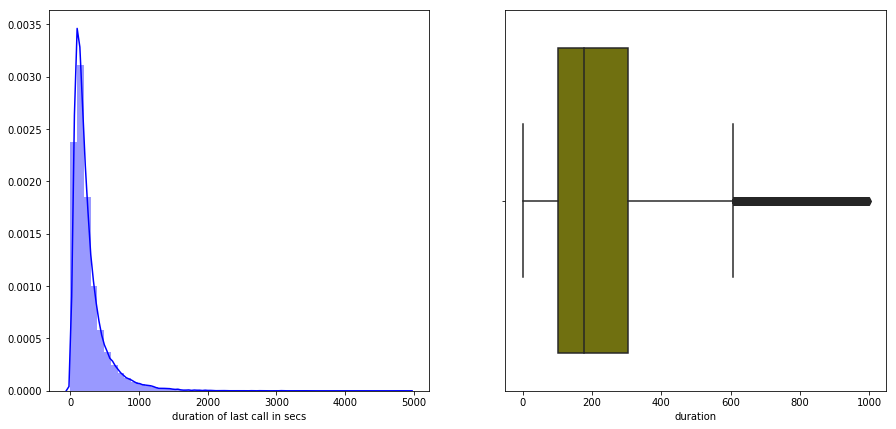

In [95]:
# visualizing duration of last call with the people contacted for this promotion

fig = plt.figure(figsize=(15,7))

# since the range of balance is (0,5000), plotted histogram
ax = plt.subplot(1,2,1)
sns.distplot(bankPromo_df['duration'], kde="False",  color="b" , axlabel="duration of last call in secs")

# to get approximate idea on majority of balances
ax = plt.subplot(1,2,2)
bankPromoSelDur_df = bankPromo_df[bankPromo_df['duration'] < 1000 ]
sns.boxplot(bankPromoSelDur_df['duration'], ax = ax, color = "olive")

plt.show()

Histogram of duration of last call for the data gathered shows a right skewed plot , with majority of calls having a duration of < 1000 secs ( approx 16 mins ).
However we do see some people showed lot of interest and continued to talk for as long as 5000 secs ( approx 80 mins ). On creating a boxplot on this subset of data where calls are < 1000 secs, it is evident that 50% of the calls did not last 200 secs ( approx 3 mins ) and 75% calls lasted around 300 secs i.e. 5 mins.

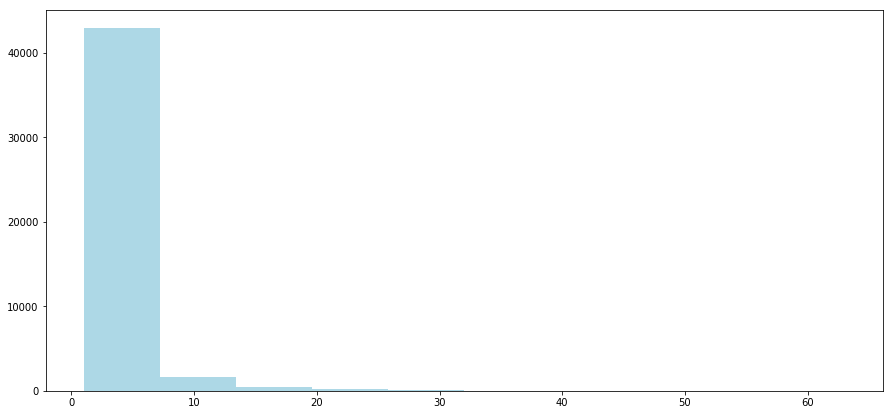

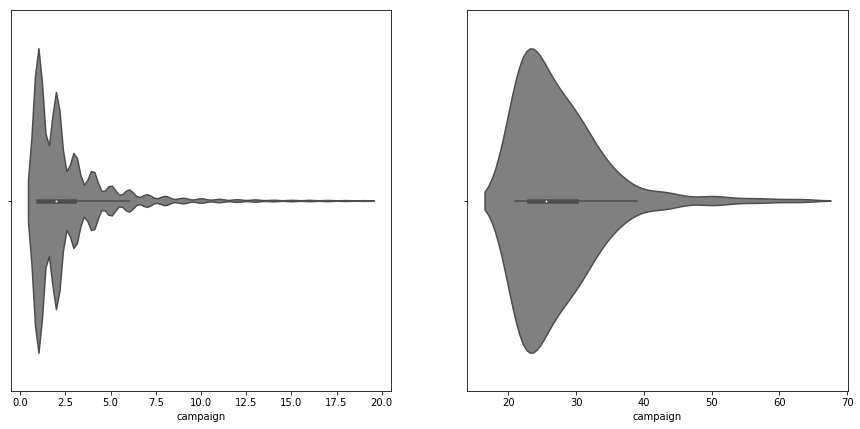

In [96]:
# visualizing number of times same person contacted during current campaign

fig = plt.figure(figsize=(15,7))

plt.hist(bankPromo_df['campaign'], color = "lightblue")
plt.show()

#lets have a closer look at the distribution of # of calls > 20 and # of calls < 20 to get a better picture
# plot subset for # of times contacted < 20 in this campaign
fig = plt.figure(figsize=(15,7))

ax = plt.subplot(1,2,1)
bankPromoSelCam1_df = bankPromo_df[bankPromo_df['campaign'] < 20]
sns.violinplot(bankPromoSelCam1_df['campaign'], color = "grey",ax = ax )

# plot subset for # of times contacted > 20 in this campaign
ax = plt.subplot(1,2,2)
bankPromoSelCam2_df = bankPromo_df[bankPromo_df['campaign'] > 20]
sns.violinplot(bankPromoSelCam2_df['campaign'], color = "grey",ax = ax )

#bankPromoSelDur_df = bankPromo_df[bankPromo_df['duration'] < 1000 ]
#sns.boxplot(bankPromoSelDur_df['duration'], ax = ax, color = "olive")

plt.show()

Simple histogram of number of times same person is contacted in the current campaign shows mostly everyone was called < 10 times. Considering the number of records in the dataset, extremely less number of people were called more than 20 times during current campaign. To get a better picture , violin plot is constructed by dividing the data based on number of calls made < 20 times or > 20. It is evident that majority of people called in the range of < 20 times have a mean of approx < 2.5 , since number of calls is a whole number, we take floor value and approximate this to 2 times only.Very few people were called more than 5 times . Looking at the smaller subset of people who were called more than 20 times, few more people called 20-30 times and extremely low count of people who were called more than 40 times. 

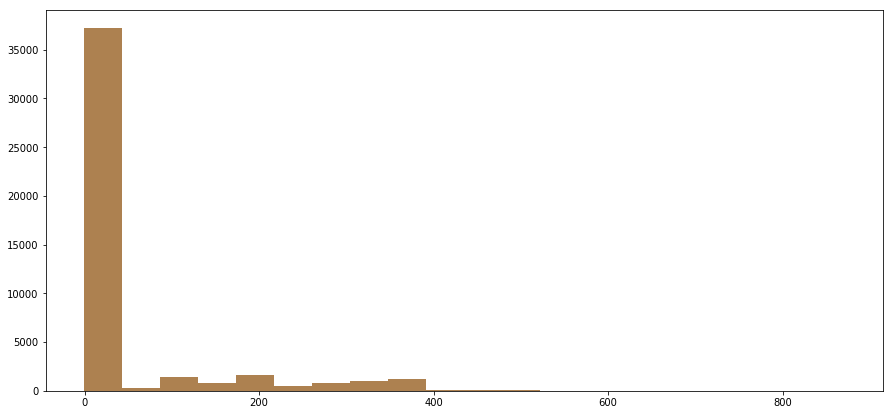

In [97]:
# visualizing number of days after last contact from previous campaign , called again for the current campaign

fig = plt.figure(figsize=(15,7))

plt.hist(bankPromo_df['pdays'], color = "#ad8150" , bins=int(20))
plt.show()

__*Majority of records have value '-1' but in the plot it is showing 0+ , i tried boxplot and distplot also, but all are showing from 0 only. That is incorrect presentation of data, if anyone can correct it to show '-1' meaning they were not contacted previously*__

# Explore Joint Attributes

# Explore Attributes and Class

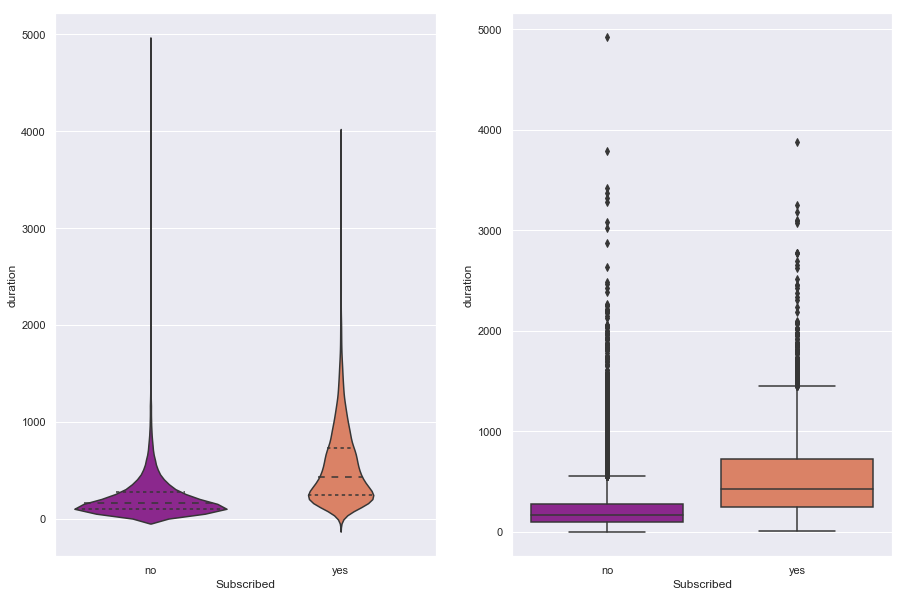

In [98]:
sns.set(style="darkgrid")
fig11, ax_durationVar = plt.subplots(nrows = 1, ncols = 2, figsize = (15,10))
sns.violinplot(data = bankPromo_df, x = "Subscribed", y = "duration", ax = ax_durationVar[0], \
               palette="plasma",inner="quartile")
sns.boxplot(data = bankPromo_df, x = "Subscribed" , y ="duration", ax = ax_durationVar[1], palette="plasma")

As seen from above plots depicting distribution of "duration" variable against class variable "Subscribed", although the spread of duration across both levels of class is right skewed, long tailed distribution, most of the data is packed relatively tightly in "No" level as compared to "Yes" level. **A higher median for duration variable in "Yes" level as compared to "No" level reveals that the people who are subscribing to promotion tend to have higher call durations. This is intuitive since generally, people who want subscribe to promotion want more information on the offering and providing all such details generally takes time for representative, resulting in higher call durations.
Based upon the argument put forward above, "duration" could be a good predictor variable in predicting whether people will subscibe or not to promotion offering.** 

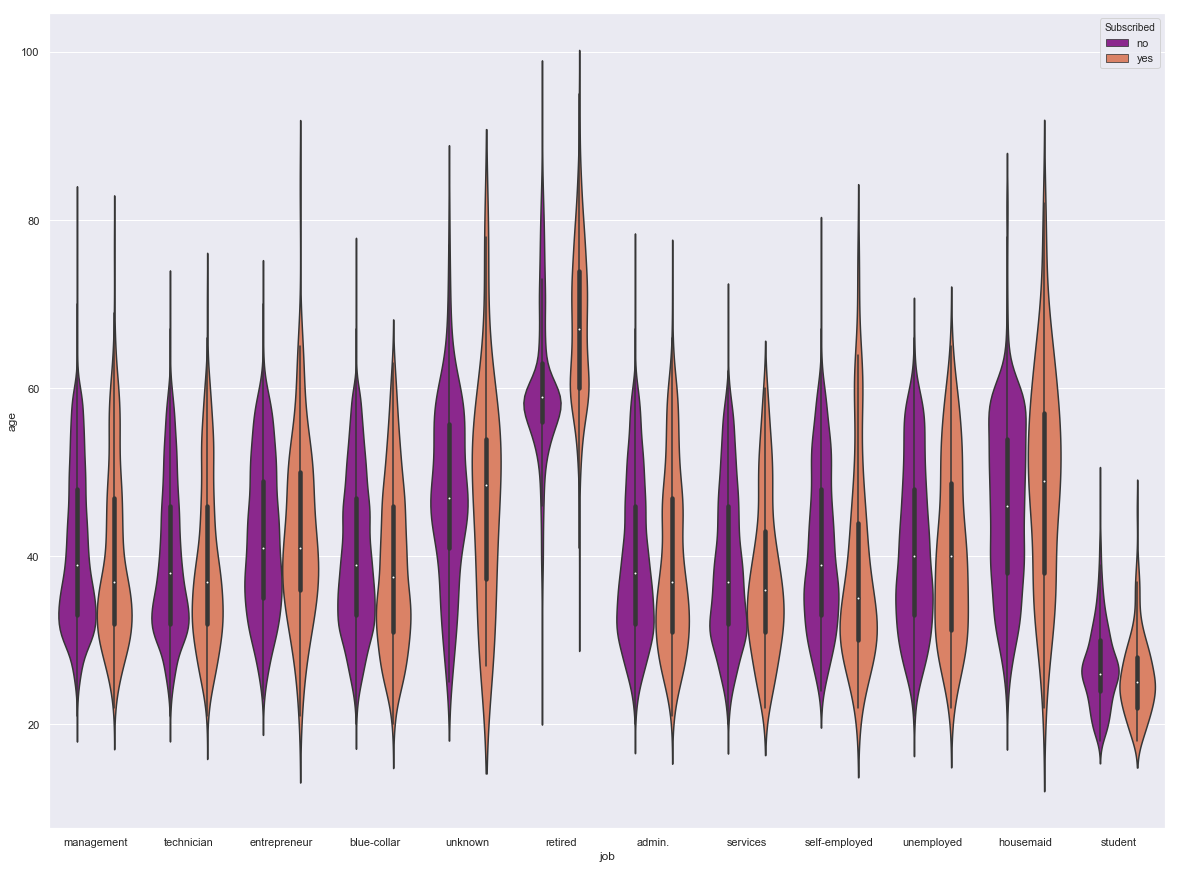

In [99]:
sns.set(style="darkgrid")
fig12, ax_ageVar = plt.subplots(figsize = (20,15))
#sns.violinplot(data = bankPromo_df, x = "Subscribed", y = "age", \
#               palette="plasma")
sns.violinplot(data = bankPromo_df, x = "job", y = "age", hue="Subscribed", \
               palette="plasma")

The key observations from the visualization of age vs job vs Subscribed(class variable) are:
1. People who are retired from job and have median age around 70 are more likely to subscribe to the promotion than group of retired people who have median age less than 60. This could very well be likely that as people get older they want to save more for inheritance purposes or for future medical expenditures.
2. Older housemaids are more likely to subscribe to the bank promotion than relatively younger housemaids.
3. Self Employed People less than 40 years of age are more likely to subscribe to the promotion than people who are self employed but more than 40 years of age.

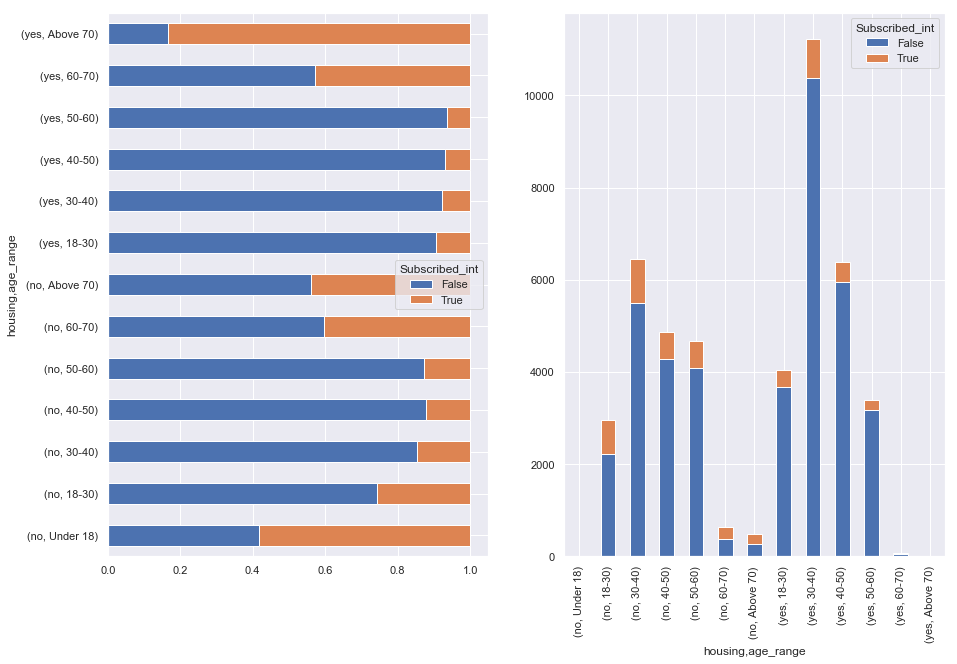

In [100]:
visDf['age_range'] = pd.cut(visDf.age,[0,18,30,40,50,60,70,1e6],3,labels=['Under 18','18-30','30-40','40-50','50-60','60-70','Above 70']) # this creates a new variable

fig13, axes_housingVar = plt.subplots(1,2,figsize=(15,10))

Subscribed_Table = pd.crosstab([ visDf['housing'],visDf['age_range'] ], 
                       visDf.Subscribed_int.astype(bool))
Subscribed_Proportion = Subscribed_Table.div(Subscribed_Table.sum(1).astype(float), axis=0)

Subscribed_Proportion.plot(kind='barh', 
                   stacked=True, ax = axes_housingVar[0])

Subscribed_Table.plot(kind='bar', stacked=True, ax = axes_housingVar[1])

As seen from above charts, people over 60 years of age, although under represented in dataset, are more willing to subscribe to promotion even if they have taken housing loan. This trend is not observed in people who are 60 and less and have taken home loans.  

# New Features

To add additional context to this data, having data sets such as:
1. Average income by profession
2. Year call was made
3. Political climate
4. City client is in
5. Client has dependent childern

To include these types of additional data the team could dive deeper into the demographic of the Portuguese citizen.  Examples of this would be knowing the city in which the client is in the team could determine whether different parts of the country were hit harder with decline in the country's market.  Knowing details of average income, the team could determine if groups within a profession weathered the recession better than others.

# Exceptional Work

For this section, we would be performing the PCA and LDA to visualize the data across transformed axis as produced by PCA and LDA. The following approach would be taken:

1. Perform the PCA first with only numeric variables and without any Categorical Variables.
2. Categorical variables with One hot encoding will be introduced second into the PCA to see whether inclusion of extra information in terms of these variables lead to better seperation between class categories.
3. Since, PCA focuses on finding componenets that maximize spread in the data and not on maximizing the class seperation, we would run the LDA to see if it does a better job than PCA in seperating the calss categories in our dataset.  

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Make a copy of original data frame
bankPromoPCA_Df = bankPromo_df.copy()
bankPromoPCA_Df['Target'] = bankPromoPCA_Df['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoPCA_Df['Target'] = bankPromoPCA_Df['Target'].astype(np.int)

# Drop all the categorical variables in the data frame for first analysis
bankPromoPCA_Df.drop(categoricalVars, inplace=True, axis=1)

bankPromoPCA_Df.head()


,age,balance,day,duration,campaign,pdays,previous,Target
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0


In [102]:
# Standardize ( centered and normalized) all numeric variables in the data set since "balance" variable
# has very higher variabilty as compared to other variables

scaler = StandardScaler()
scaledBankPromoPCAData = scaler.fit(bankPromoPCA_Df.drop("Target", axis =1)).transform(bankPromoPCA_Df.drop("Target", axis =1))


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [103]:
# Run the PCA
pca = PCA(n_components=2)
X_pca = pca.fit(scaledBankPromoPCAData).transform(scaledBankPromoPCAData)
print(scaledBankPromoPCAData.shape)
print(X_pca.shape)

(45211, 7)
(45211, 2)


In [104]:
###### Function Taken from Dr. Larsons Notebook ##############################

# this function definition just formats the weights into readable strings
# you can skip it without loss of generality to the Data Science content
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:])
        tmp_array.append(tmp_string)
    return tmp_array
  
# now let's get to the Data Analytics!
pca_weight_strings = get_feature_names_from_weights(pca.components_, numericalVars) 

# create some pandas dataframes from the transformed outputs
df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])
df_pca["Target"] = bankPromoPCA_Df["Target"]

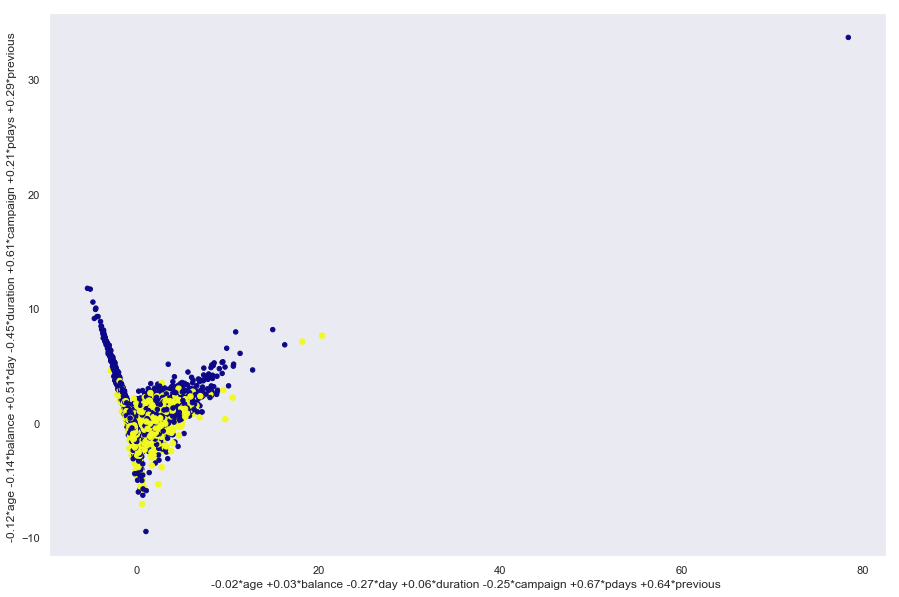

In [105]:
plt.figure(figsize=(15,10))
plt.scatter(x = df_pca[pca_weight_strings[0]], y = df_pca[pca_weight_strings[1]] , \
            c = df_pca["Target"], cmap ="plasma", s = (df_pca["Target"] + 2)*10)
plt.xlabel(pca_weight_strings[0])
plt.ylabel(pca_weight_strings[1])
plt.grid()

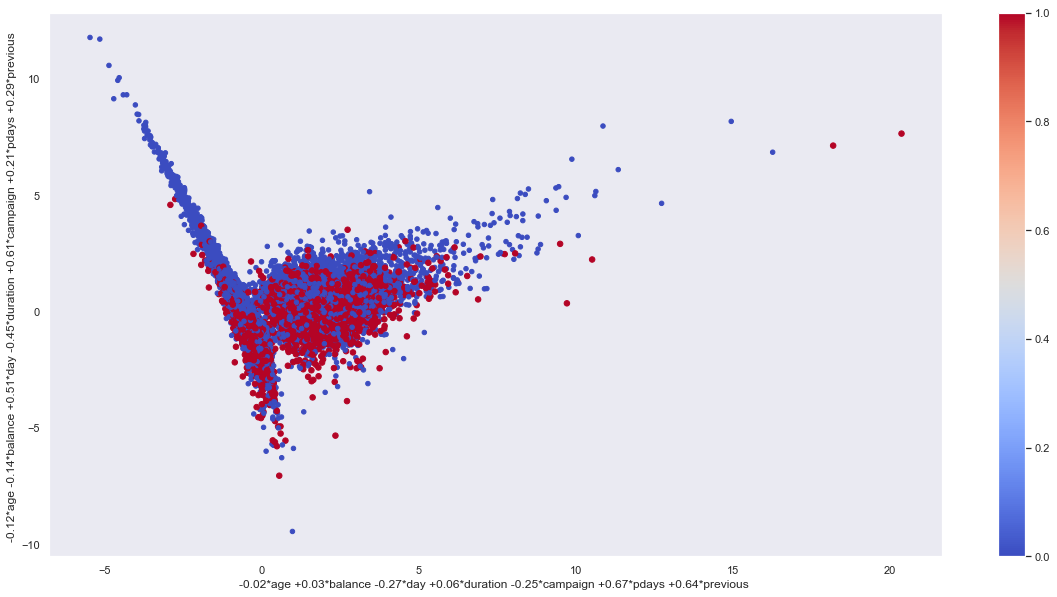

In [106]:
# Determine the index of outlier observation and temporary remove that obervation to visualize the 
# data seperation, if any, better
tmpDf = pd.DataFrame()
tmpDf = df_pca.drop(index = df_pca[df_pca[pca_weight_strings[0]] > 50].dropna(how = "all", axis = 0).index[0], \
                    axis = 0)
# Plot again
plt.figure(figsize=(20,10))
plt.scatter(x = tmpDf[pca_weight_strings[0]], y = tmpDf[pca_weight_strings[1]] , \
            c = tmpDf["Target"], cmap ="coolwarm", s = (tmpDf["Target"] + 2)*10)
plt.xlabel(pca_weight_strings[0])
plt.ylabel(pca_weight_strings[1])
plt.grid()
plt.colorbar()

In [107]:
# Perform The LDA
lda = LDA(n_components=1)
X_lda = lda.fit(X = bankPromoPCA_Df.drop("Target", axis =1), \
                y = bankPromoPCA_Df["Target"]).transform(bankPromoPCA_Df.drop("Target", axis =1))
lda_weight_strings = get_feature_names_from_weights(lda.scalings_.T, numericalVars)
df_lda = pd.DataFrame(X_lda,columns=[lda_weight_strings])
df_lda["Target"] = bankPromoPCA_Df["Target"]

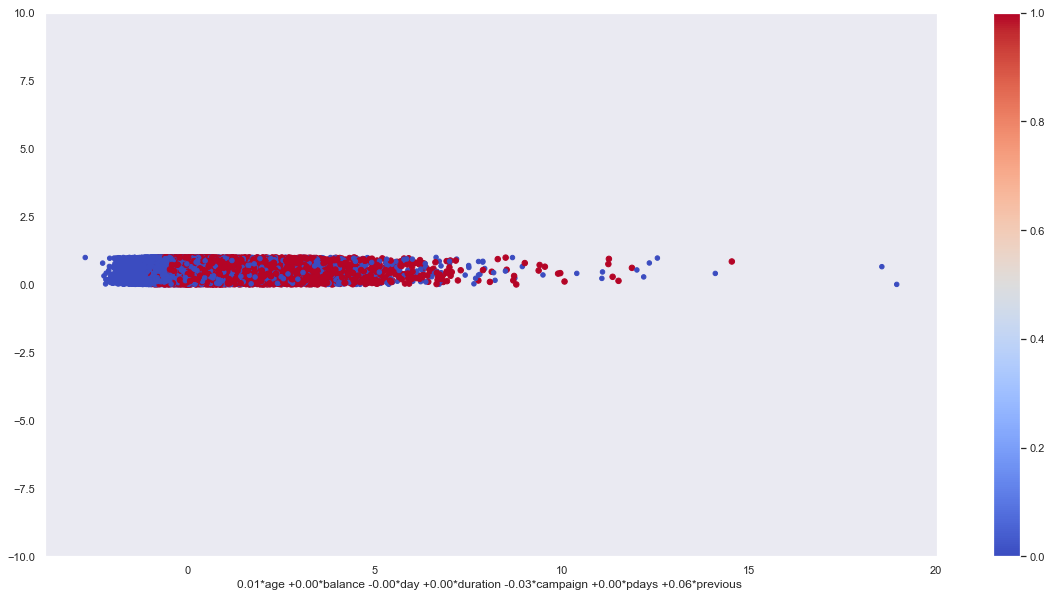

In [108]:
plt.figure(figsize=(20,10))
plt.scatter(x = df_lda[lda_weight_strings[0]] , y = np.zeros(df_lda[lda_weight_strings[0]].shape[0]) + \
            np.random.rand(df_lda[lda_weight_strings[0]].shape[0]), \
            c = df_lda["Target"], cmap ="coolwarm", s = (df_lda["Target"] + 2)*10)
plt.xlabel(lda_weight_strings[0])
plt.ylim(-10,10)
plt.colorbar()
plt.grid()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


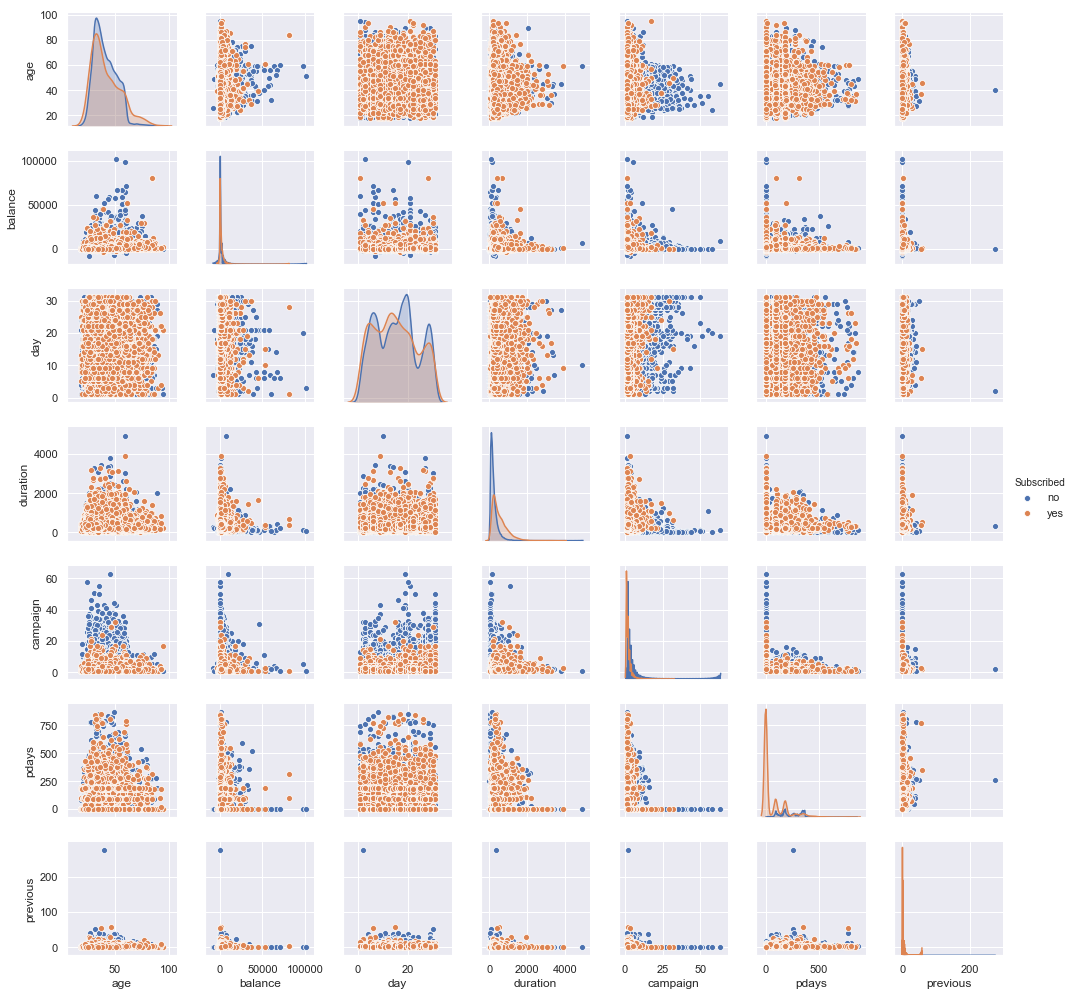

In [109]:
sns.pairplot(data = bankPromo_df, hue = "Subscribed", size = 2)